In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, initializers
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pandas as pd
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import utils

In [2]:
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [3]:
model = load_model("dataset/EfficientNetB3-balls-99.23.h5")

# 方法一

In [4]:
class_dict_data = pd.read_csv("dataset/class_dict.csv")
balls_data = pd.read_csv("dataset/balls.csv")
classes_num = class_dict_data["class"].size

In [5]:
class_dict_data.head(1)

,class_index,class,height,width,scale by
0,0,baseball,128,128,1


In [6]:
balls_data.head(1)

,filepaths,labels,data set
0,train/baseball/001.jpg,baseball,train


In [7]:
X_data = []
Y_data = []
for i in range(len(balls_data)):
    if balls_data["data set"][i] != "test":
        continue
    filepath = balls_data["filepaths"][i]
    real_filepath = f"dataset/{filepath}"
    label = balls_data["labels"][i]
    label_index = class_dict_data[class_dict_data["class"] == label].index.to_list()[0]
    # print(f"{i}. {real_filepath}, {label}, {label_index}")
    X_data.append(real_filepath)
    Y_data.append(label_index)

In [8]:
X_data_img = []
for x_data in X_data:
    img = cv2.imread(x_data)
    img_resize = cv2.resize(img, (128, 128))
    img_normalization = img_resize * (1 / 255)
    X_data_img.append(img_normalization)
X_data_img = np.array(X_data_img)
X_data_img.shape

(130, 128, 128, 3)

In [9]:
predicts = model.predict(X_data_img)
predicts_classes = np.argmax(predicts, 1)

# 方法二

ImageDataGenerator詳細：https://zhuanlan.zhihu.com/p/30197320

In [10]:
test_dir = "dataset/test"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir, shuffle=False, batch_size=130, class_mode="categorical", target_size=(128, 128))

Found 130 images belonging to 26 classes.


In [11]:
Y_data = np.argmax(test_generator[0][1], 1)

In [12]:
predicts = model.predict(test_generator[0][0])
predicts_classes = np.argmax(predicts, 1)

# 結果

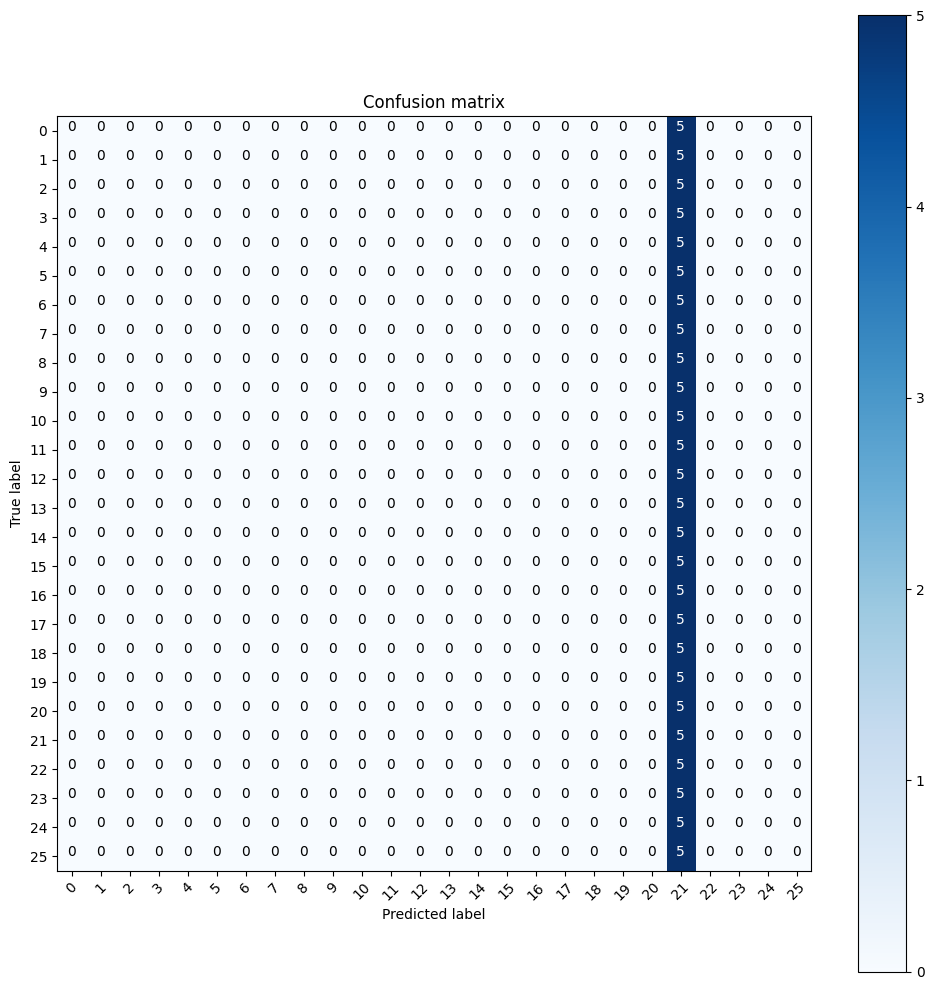

In [13]:
utils.plot_confusion_matrix(Y_data, predicts_classes, 26, figsize=(10, 10), dpi=100)

# 模型結構

In [14]:
len(model.layers)

389

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 128, 128, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 129, 129, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

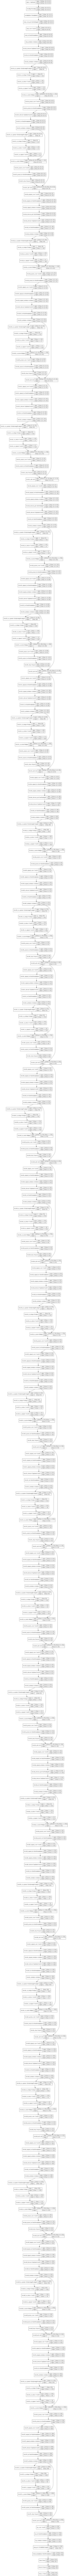

In [16]:
plot_model(model, show_shapes=True)